In [2]:
from scipy import signal
import os
import pickle
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

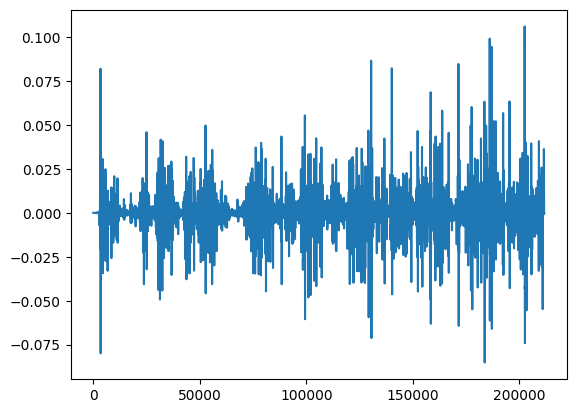

In [25]:
data, fs = librosa.load('Texture_Dataset/G1AluminumMesh/G1RhombAluminumMesh_Sound_Movement_train1.wav', sr=44100)
b, a = signal.butter(3, [20 / fs, 1000 / fs], 'bandpass')
data = signal.filtfilt(b, a, data)
plt.plot(data)
DMatrix = librosa.stft(data, n_fft=512, hop_length=int(512 * 0.9), window='hann')
dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)

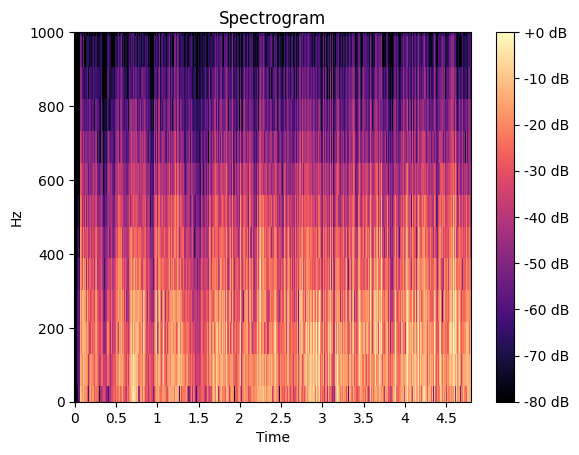

In [33]:
fig, ax = plt.subplots()
img = librosa.display.specshow(dbMatrix, sr=fs, n_fft=512, hop_length=int(512 * 0.9), y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
plt.ylim(0, 1000)
fig.colorbar(img, ax=ax, format="%+2.0f dB")

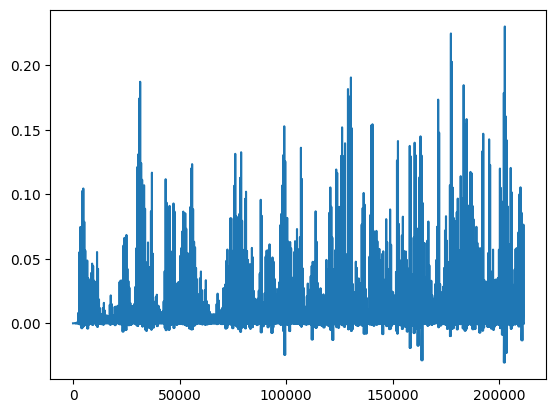

In [34]:
DMatrix_hat = librosa.db_to_amplitude(dbMatrix[:12,:])
plt.plot(librosa.istft(DMatrix_hat, n_fft=512, hop_length=int(512 * 0.9), window='hann'))

(12, 461)


array([-11.02539896, -11.74054193, -13.99933573, -18.19477937,
       -25.32502186, -39.38734777, -43.22299002, -43.7489166 ,
       -49.63890805, -54.83326675, -64.28732377, -62.28626666])

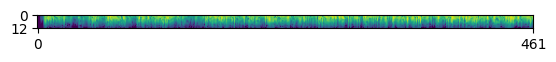

In [18]:
plt.imshow(dbMatrix[:12,:])
plt.yticks([0, 12])
plt.xticks([0, 461])
print(np.array(dbMatrix[:12,:]).shape)

In [6]:
def wav2spec(wav_path):
    data, fs = librosa.load(wav_path, sr=44100)
    b, a = signal.butter(3, [20 / fs, 1000 / fs], 'bandpass')
    data = signal.filtfilt(b, a, data)
    DMatrix = librosa.stft(data, n_fft=512, hop_length=int(512 * 0.9), window='hann')
    dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)

    return dbMatrix[:12,:]

In [7]:
dataset_path = 'Texture_Dataset'
autoencoder_data = {"spectrogram": [], "texture": []}

for texture_dir in os.listdir(dataset_path):
    if texture_dir[0] != '.':
        for spectrogram in os.listdir(dataset_path + '/' + texture_dir):
            spec = wav2spec(dataset_path + '/' + texture_dir + '/' + spectrogram)
            samples = np.lib.stride_tricks.sliding_window_view(spec,(12,100))
            samples = samples.squeeze()
            autoencoder_data['spectrogram'].extend(samples)
            autoencoder_data['texture'].extend([texture_dir[:2]] * 362)

autoencoder_data['spectrogram'] = np.array(autoencoder_data['spectrogram'])
file = open('trainset.pickle', 'wb')
pickle.dump(autoencoder_data, file)
file.close()


In [8]:
with open('trainset.pickle', 'rb') as file:
    autoencoder_data = pickle.load(file)

In [10]:
autoencoder_data['spectrogram'].shape

(36200, 12, 100)